In [2]:
import torch.nn as nn

In [3]:
# 定数（モデル定義時に必要となるもの）
INPUT_FEATURES = 2  # 入力（特徴）の数： 2
OUTPUT_NEURONS = 1  # ニューロンの数： 1

In [4]:
# 変数（モデル定義時に必要となるもの）
activation = torch.nn.Tanh()  # 活性化関数： tanh関数

In [5]:
activation

Tanh()

In [6]:
# 「torch.nn.Moduleクラスのサブクラス化」によるモデルの定義
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # 層（layer：レイヤー）を定義
        self.layer1 = nn.Linear(  # Linearは「全結合層」を指す
            INPUT_FEATURES,       # データ（特徴）の入力ユニット数
            OUTPUT_NEURONS)       # 出力結果への出力ユニット数

    def forward(self, input):
        # フィードフォワードを定義
        output = activation(self.layer1(input))  # 活性化関数は変数として定義
        # 「出力＝活性化関数（第n層（入力））」の形式で記述する。
        # 層（layer）を重ねる場合は、同様の記述を続ければよい（第3回）。
        # 「出力（output）」は次の層（layer）への「入力（input）」に使う。
        # 慣例では入力も出力も「x」と同じ変数名で記述する（よって以下では「x」と書く）
        return output

In [8]:
# モデル（NeuralNetworkクラス）のインスタンス化
model = NeuralNetwork()

In [9]:
model

NeuralNetwork(
  (layer1): Linear(in_features=2, out_features=1, bias=True)
)

In [26]:
# パラメーター（ニューロンへの入力で必要となるもの）の定義
# 重みとバイアスの初期値設定
model.layer1.weight = nn.Parameter(torch.tensor([[0.6, -0.2]]))  # 重み
model.layer1.bias = nn.Parameter(torch.tensor([0.8]))  # バイアス
# modelname.layername.weight/bias = nn.Parameter(torch.tensor[if scalar, [].
                                                # elif ndarray such as weight, [[]].])

In [29]:
# torch.nn.Module全体の状態を辞書形式で取得
params = model.state_dict()
params

OrderedDict([('layer1.weight', tensor([[ 0.6000, -0.2000]])),
             ('layer1.bias', tensor([0.8000]))])

In [28]:
# or
list(model.parameters())

[Parameter containing:
 tensor([[ 0.6000, -0.2000]], requires_grad=True), Parameter containing:
 tensor([0.8000], requires_grad=True)]

In [30]:
# feed forward
X_data = torch.tensor([[1.0, 2.0]])  # 入力する座標データ（1.0、2.0）
print(X_data)
# tensor([[1., 2.]]) ……などと表示される

y_pred = model(X_data)  # このモデルに、データを入力して、出力を得る（＝予測：predict）
print(y_pred)
# tensor([[0.7616]], grad_fn=<TanhBackward>) ……などと表示される
# grad_dn is the a() used to compute partial deriv for backprop

tensor([[1., 2.]])
tensor([[0.7616]], grad_fn=<TanhBackward>)


In [38]:
from torchviz import make_dot
# conda install graphviz

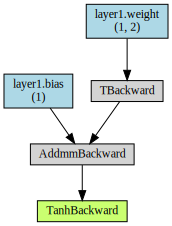

In [42]:
make_dot(y_pred, params=dict(model.named_parameters()))

In [ ]:
"""
青色のボックス： 勾配を計算する必要があるパラメーター（重みやバイアスなど）。
　　　　　　 　この例では(1, 2)が重みで、(1)がバイアス
灰色のボックス： 勾配（偏微分）などを計算するための関数。
　　　　　　 　関数（この例では「TBackward」や「AddmmBackward」）は
　　　　　　 　「テンソル」データのgrad_fn属性に自動作成されている
緑色のボックス： グラフ計算の開始点。
　　　　　　 　backward()メソッド（後述）を呼び出すと、ここから逆順に計算していく。
　　　　　　 　内容は灰色のボックスと同じ
"""

In [47]:
# Backprop with AutoGrad (自動微分) via bakckward()
# e.g.

tensor(1., grad_fn=<PowBackward0>)
tensor(2.)


In [71]:
# let x = 1 (forward feed of x)

x = torch.tensor(1.0, requires_grad=True)  # 今回は入力に勾配（gradient）を必要とする
# 「requires_grad」が「True」（デフォルト：False）の場合、
# torch.autogradが入力テンソルに関するパラメーター操作（勾配）を記録するようになる

#x.requires_grad_(True)  # 「requires_grad_()」メソッドで後から変更することも可能

In [72]:
# define model. here, y = x**2.
# FFの段階では、y = 1**2 = 1となる。

y = x ** 2     # 「yイコールxの二乗」という計算式の計算グラフを構築
print(y)       # tensor(1., grad_fn=<PowBackward0>) ……などと表示される

tensor(1., grad_fn=<PowBackward0>)


In [73]:
# backprop. start from output y. in NN, start from final activation (yhat)

y.backward()   # 逆伝播の処理として、上記式から微分係数（＝勾配）を計算（自動微分：Autograd）

In [75]:
g = x.grad     # 与えられた入力（x）によって計算された勾配の値（grad）を取得
print(g)       # tensor(2.)  ……などと表示される

tensor(2.)


In [ ]:
# output is gradient at x defined at initial feed (=1.0)
# dy/dx = 2x = 2(1) = 2

# with SGD, this will be used to make a step;
# x will be updated from initial feed value;
# gradient at x will be updated, then used for another epoch.

In [83]:
# 勾配計算の前に、各パラメーター（重みやバイアス）の勾配の値（grad）をリセットしておく
model.layer1.weight.grad = None      # 重み
model.layer1.bias.grad = None        # バイアス
#model.zero_grad()                   # これを呼び出しても上記と同じくリセットされる

X_data = torch.tensor([[1.0, 2.0]])  # 入力データ（※再掲）
y_pred = model(X_data)               # 出力結果（※再掲）
y_true = torch.tensor([[1.0]])       # 正解ラベル

tensor([[-0.2002, -0.4005]])
tensor([-0.2002])


In [ ]:
criterion = nn.MSELoss()             # 誤差からの損失を測る「基準」＝損失関数
loss = criterion(y_pred, y_true)     # 誤差（出力結果と正解ラベルの差）から損失を取得
loss.backward()   # 逆伝播の処理として、勾配を計算（自動微分：Autograd）

# 勾配の値（grad）は、各パラメーター（重みやバイアス）から取得できる
print(model.layer1.weight.grad) # tensor([[-0.2002, -0.4005]])  ……などと表示される
print(model.layer1.bias.grad)   # tensor([-0.2002])  ……などと表示される
# ※パラメーターは「list(model.parameters())」で取得することも可能

In [ ]:
# above is one epoch of backprop.
# .backward() is applied to loss since